In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx
from create_env import *
import utils as utils
import numpy as np

In [3]:

number_agents = 4

size_side = 7
env = EnvWrapperGraph(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=10, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()



env_renderer = RenderTool(env)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

In [4]:
matrix_rail = np.array(env.rail.grid.tolist())

/home/charles/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


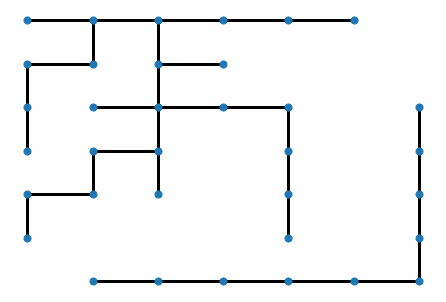

In [5]:
env.show_graph()

/home/charles/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


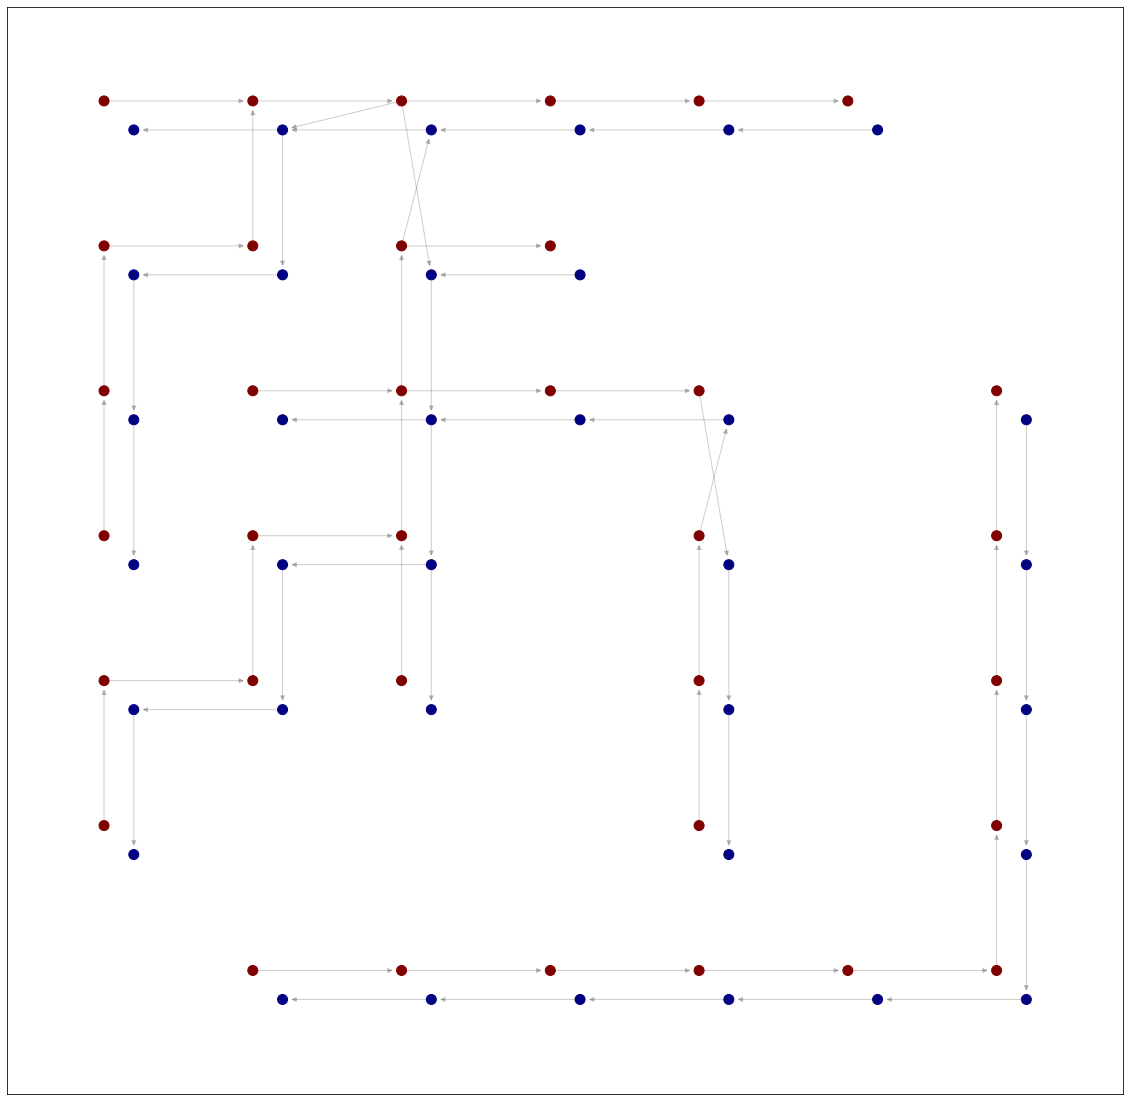

In [6]:
env.show_graph(high_level=False,figsize=(20,20))

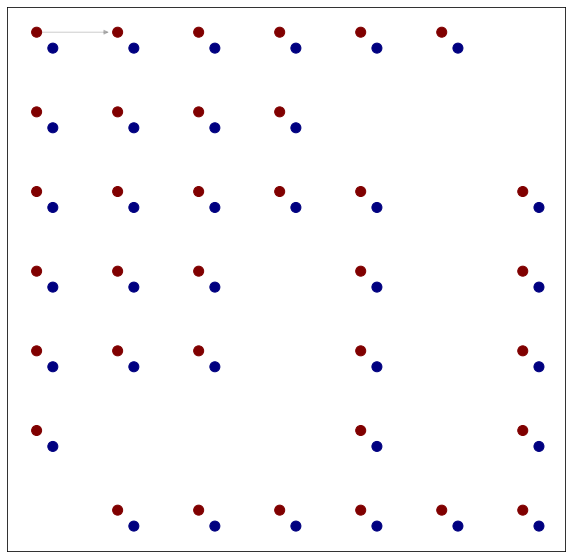

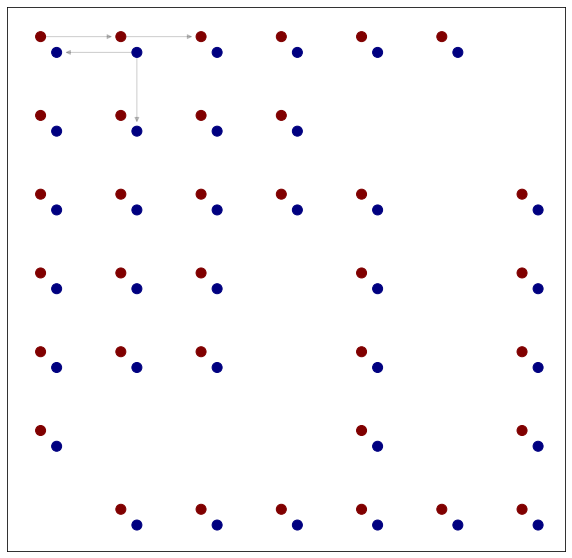

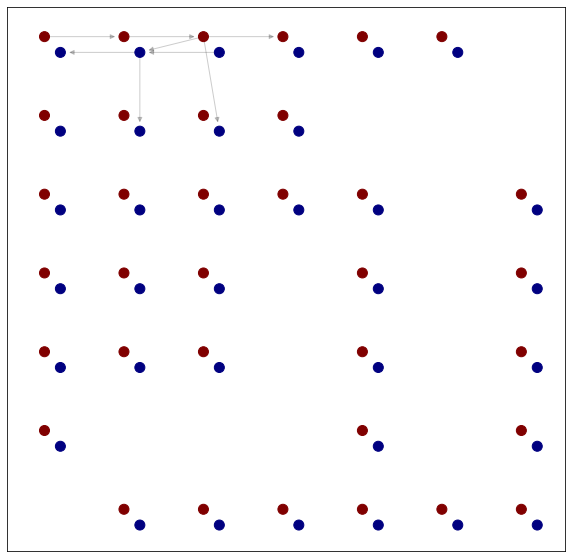

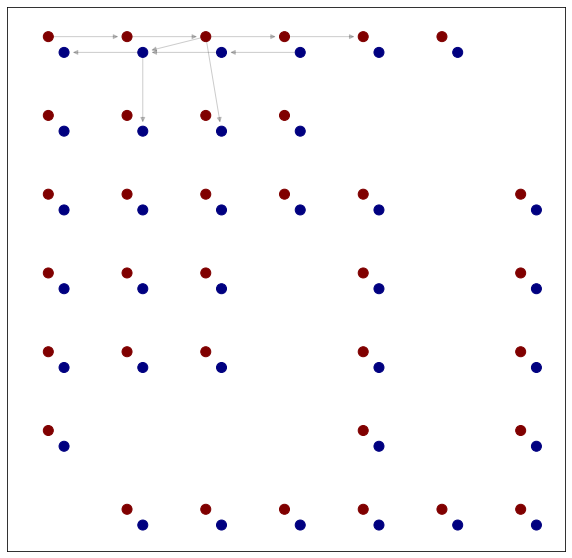

In [ ]:
env.recompute_graph()
env.show_graph(high_level=False,figsize=(20,20))

In [ ]:
for node,_ in np.ndenumerate(matrix_rail):
    if tuple_to_str(node) in env.graph_high_level.nodes:
        check, error = is_wrong_connections(node, env.graph_low_level, matrix_rail)
        if check:
            print(f'node {node} has a bad connection: {error}')